## MVP

the goal of this project would be an analysis of passenger’s behavior whom choose the yellow taxi service, to help the taxi drivers as well as the company to know when the best time to serve and when to reduce or avoid serving.
The data was obtained from NTC taxi and limousine commission https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

this notebook will cover the following
1-	Database connection 
2-	Perform some EDA to learn more about the data
3-	Cleaning some data

 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import sqlite3 as sql

In [4]:
#create connection to database file
database = r"C:\Users\win10\Desktop\yellow_tripdata.db"
connect  = sql.connect(database)
query = '''select * from yellow_tripdata'''
df = pd.read_sql_query(query, connect)
df.head()



,VendorID,tpep_pickup_datetime,time_pickup,tpep_dropoff_datetime,time_dropoff,passenger_count,trip_distance,RatecodeID8,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2/1/2021 0:40,0:40,2/1/2021 0:48,0:48,1,2.30,1,N,141,226,2,8.5,3.0,0.5,0.00,0.0,0.3,12.30,2.5
1,1,2/1/2021 0:07,0:07,2/1/2021 0:20,0:20,1,1.60,1,N,43,263,2,9.5,3.0,0.5,0.00,0.0,0.3,13.30,0.0
2,1,2/1/2021 0:59,0:59,2/1/2021 1:24,1:24,1,5.30,1,N,114,263,2,19.0,3.0,0.5,0.00,0.0,0.3,22.80,2.5
3,2,2/1/2021 0:03,0:03,2/1/2021 0:16,0:16,1,2.79,1,N,236,229,1,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
4,2,2/1/2021 0:20,0:20,2/1/2021 0:24,0:24,2,0.64,1,N,229,140,1,4.5,0.5,0.5,1.66,0.0,0.3,9.96,2.5


In [5]:
#check the data type
df.dtypes

passenger_count      int64
tip_amount         float64
dtype: object

In [6]:
#runing a query
query = '''select passenger_count, tip_amount  from yellow_tripdata
where passenger_count > 2'''
df = pd.read_sql_query(query, connect)
df.head()

,passenger_count,tip_amount
0,4,6.20
1,3,4.14
2,5,9.73
3,6,0.00
4,6,2.58


In [7]:
#selecting all columns
query = '''select * from yellow_tripdata
where passenger_count > 2'''
df2 = pd.read_sql_query(query, connect)
df2.head()

,VendorID,tpep_pickup_datetime,time_pickup,tpep_dropoff_datetime,time_dropoff,passenger_count,trip_distance,RatecodeID8,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2/1/2021 0:52,0:52,2/1/2021 1:16,1:16,4,6.07,1,N,249,181,1,21.0,0.5,0.5,6.20,0.00,0.3,31.00,2.5
1,2,2/1/2021 0:15,0:15,2/1/2021 0:27,0:27,3,2.73,1,N,186,237,1,10.0,0.5,0.5,4.14,0.00,0.3,17.94,2.5
2,2,2/5/2021 0:04,0:04,2/5/2021 0:22,0:22,5,7.15,1,N,161,36,1,22.5,0.5,0.5,9.73,6.12,0.3,42.15,2.5
3,2,2/1/2021 0:38,0:38,2/1/2021 0:53,0:53,6,4.27,1,N,263,68,2,14.5,0.5,0.5,0.00,0.00,0.3,18.30,2.5
4,2,1/31/2021 23:57,23:57,2/1/2021 0:02,0:02,6,1.44,1,N,158,100,1,6.5,0.5,0.5,2.58,0.00,0.3,12.88,2.5


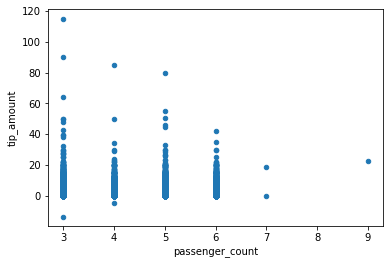

In [8]:
df2.plot(kind = 'scatter', x = 'passenger_count', y = 'tip_amount')

plt.show()

In [9]:
#check for duplication
print(df2.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
94003    False
94004    False
94005    False
94006    False
94007    False
Length: 94008, dtype: bool


In [10]:
#data cleaning
df2.drop('store_and_fwd_flag', axis=1, inplace=True)
df2.head()

,VendorID,tpep_pickup_datetime,time_pickup,tpep_dropoff_datetime,time_dropoff,passenger_count,trip_distance,RatecodeID8,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2/1/2021 0:52,0:52,2/1/2021 1:16,1:16,4,6.07,1,249,181,1,21.0,0.5,0.5,6.20,0.00,0.3,31.00,2.5
1,2,2/1/2021 0:15,0:15,2/1/2021 0:27,0:27,3,2.73,1,186,237,1,10.0,0.5,0.5,4.14,0.00,0.3,17.94,2.5
2,2,2/5/2021 0:04,0:04,2/5/2021 0:22,0:22,5,7.15,1,161,36,1,22.5,0.5,0.5,9.73,6.12,0.3,42.15,2.5
3,2,2/1/2021 0:38,0:38,2/1/2021 0:53,0:53,6,4.27,1,263,68,2,14.5,0.5,0.5,0.00,0.00,0.3,18.30,2.5
4,2,1/31/2021 23:57,23:57,2/1/2021 0:02,0:02,6,1.44,1,158,100,1,6.5,0.5,0.5,2.58,0.00,0.3,12.88,2.5


In [11]:
#sorting payment type
sot = df2[['time_pickup','tip_amount', 'passenger_count','trip_distance','payment_type']].sort_values('payment_type',ascending = True).reset_index(drop=True)
sot.head(10)

,time_pickup,tip_amount,passenger_count,trip_distance,payment_type
0,0:52,6.20,4,6.07,1
1,23:44,4.20,3,4.30,1
2,23:02,1.96,3,1.13,1
3,23:27,2.36,5,1.65,1
4,23:27,2.16,4,1.42,1
5,23:45,0.00,5,8.46,1
6,23:19,2.00,5,4.17,1
7,22:22,0.00,3,19.40,1
8,22:37,0.00,3,10.32,1
9,22:28,2.94,3,0.91,1


In [12]:
sot = df2[['time_dropoff','tip_amount', 'passenger_count','trip_distance', 'payment_type','total_amount']].sort_values('payment_type',ascending = False).reset_index(drop=True)
sot.head(10)

,time_dropoff,tip_amount,passenger_count,trip_distance,payment_type,total_amount
0,12:47,0.0,3,0.90,4,9.8
1,18:22,0.0,4,0.92,4,-8.3
2,21:11,0.0,5,0.75,4,-8.3
3,16:39,0.0,3,0.38,4,-7.8
4,10:34,0.0,3,0.00,4,3.3
5,23:35,0.0,5,0.03,4,-6.3
6,8:38,0.0,6,0.18,4,-6.3
7,15:31,0.0,4,0.16,4,-55.3
8,13:01,0.0,5,0.00,4,-3.3
9,12:13,-5.0,4,0.00,4,-105.3


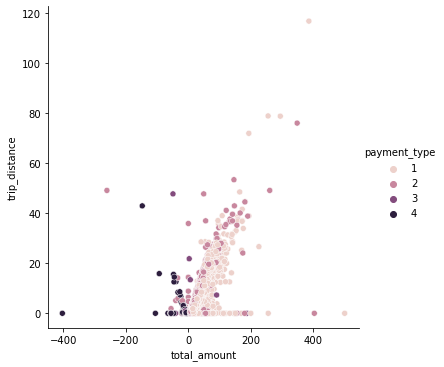

In [13]:
sns.relplot(x='total_amount', y='trip_distance', hue='payment_type', data=df2)

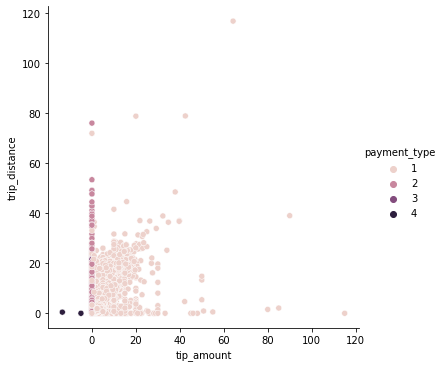

In [9]:
sns.relplot(x='tip_amount', y='trip_distance', hue='payment_type', data=df2)

## Conclusion

My assumption was wrong I thought time of the day has the impact of passenger’s behavior not paying total amount or dispute with the taxi driver. But after Perform some EDA I found distance have the most impact on passenger’s behavior  and I will investigate more on that in the next step. 